In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn
THD=pandas.read_csv("Transformed_Housing_Data2.csv")

In [2]:
THD

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


# First Predictive Model

##### One of the best ways to predict the sale price is to find the mean:

In [3]:
THD['mean_sales']=THD['Sale_Price'].mean()
THD['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

##### Overall Mean compared to Sale Price:

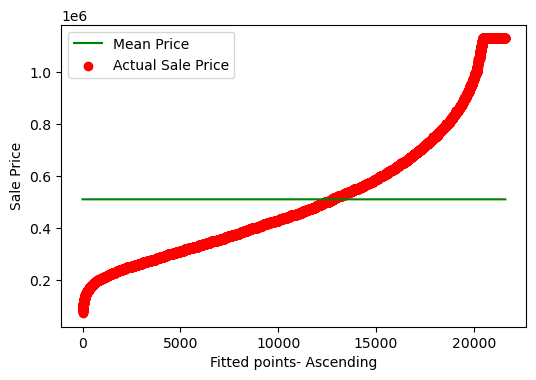

In [4]:
plt.figure(dpi=100)
k=range(0,len(THD))
plt.scatter(k, THD['Sale_Price'].sort_values(), color="red", label="Actual Sale Price")
plt.plot(k, THD['mean_sales'].sort_values(), color="green", label="Mean Price")
plt.xlabel("Fitted points- Ascending")
plt.ylabel("Sale Price")
plt.legend()

#### A better estimation would be to calculate the mean sale price respective to the Overall Grade of the house:

In [5]:
grades_mean=THD.pivot_table(values="Sale_Price", columns="Overall Grade", aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


##### Mean Sale Price w.r.t other columns:

In [6]:
grades_mean2=THD.pivot_table(values="Sale_Price", columns=["No of Bedrooms", "No of Bathrooms"], aggfunc=np.mean)
grades_mean2

No of Bedrooms              0                                                \
No of Bathrooms           0.00      0.75      1.00      1.50           2.50   
Sale_Price       497360.714286  265000.0  228000.0  288000.0  299983.333333   

No of Bedrooms              1                                           \
No of Bathrooms           0.00      0.50           0.75           1.00   
Sale_Price       279666.666667  255000.0  251053.703704  316629.956522   

No of Bedrooms             ...         8         9                        \
No of Bathrooms      1.25  ...       6.00      3.00       4.00      4.50   
Sale_Price       823037.5  ...  1129575.0  817000.0  1129575.0  864787.0   

No of Bedrooms                   10                             11        33  
No of Bathrooms      7.50      2.00      3.00       5.25      3.00      1.75  
Sale_Price       450000.0  650000.0  660000.0  1129575.0  520000.0  640000.0  

[1 rows x 144 columns]

##### Now, making a column to represent mean for the grade of that row:

In [7]:
#declaring an empty column:
THD['grade_mean']=0

#assigning values for each row:
for i in grades_mean.columns:
    THD['grade_mean'][THD['Overall Grade']==i] = grades_mean[i][0]

THD['grade_mean'].head()

<ipython-input-7-4657b74cb1c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  THD['grade_mean'][THD['Overall Grade']==i] = grades_mean[i][0]
<ipython-input-7-4657b74cb1c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  THD['grade_mean'][THD['Overall Grade']==i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

### A list for every Sale Price respective to each Grade:

In [8]:
gradewise_list=[]
for i in range(1,11):
    k=THD['Sale_Price'][THD['Overall Grade']==i]
    gradewise_list.append(k)
gradewise_list

[19450    142000.0
 Name: Sale_Price, dtype: float64,
 4409     1129575.0
 4809     1129575.0
 5449     1129575.0
 6039     1129575.0
 7033     1129575.0
 7250     1129575.0
 7905     1129575.0
 9252     1129575.0
 10371    1129575.0
 13409    1129575.0
 13698    1129575.0
 14554    1129575.0
 19015    1129575.0
 Name: Sale_Price, dtype: float64,
 1147     75000.0
 3221    262000.0
 5830    280000.0
 Name: Sale_Price, dtype: float64,
 348      299000.0
 463       80000.0
 1064     140000.0
 3580     355000.0
 3883     248000.0
 4866     228000.0
 5202     352000.0
 6478     217000.0
 7971     120000.0
 8595     205000.0
 8617     355000.0
 8621     325000.0
 9639     330000.0
 9792     435000.0
 11498    229050.0
 11586    188000.0
 12073    156000.0
 13999    130000.0
 14089    152000.0
 14579     95000.0
 15038    200000.0
 15710    150000.0
 16338    100000.0
 16528     90000.0
 17392    145000.0
 18050    247000.0
 18164    230000.0
 18377    265000.0
 19342    151000.0
 Name: Sale

In [9]:
classwise_list=[]
for i in range(1,11):
    k=THD['Sale_Price'][THD['Overall Grade']==i]
    classwise_list.append(k)
classwise_list

[19450    142000.0
 Name: Sale_Price, dtype: float64,
 4409     1129575.0
 4809     1129575.0
 5449     1129575.0
 6039     1129575.0
 7033     1129575.0
 7250     1129575.0
 7905     1129575.0
 9252     1129575.0
 10371    1129575.0
 13409    1129575.0
 13698    1129575.0
 14554    1129575.0
 19015    1129575.0
 Name: Sale_Price, dtype: float64,
 1147     75000.0
 3221    262000.0
 5830    280000.0
 Name: Sale_Price, dtype: float64,
 348      299000.0
 463       80000.0
 1064     140000.0
 3580     355000.0
 3883     248000.0
 4866     228000.0
 5202     352000.0
 6478     217000.0
 7971     120000.0
 8595     205000.0
 8617     355000.0
 8621     325000.0
 9639     330000.0
 9792     435000.0
 11498    229050.0
 11586    188000.0
 12073    156000.0
 13999    130000.0
 14089    152000.0
 14579     95000.0
 15038    200000.0
 15710    150000.0
 16338    100000.0
 16528     90000.0
 17392    145000.0
 18050    247000.0
 18164    230000.0
 18377    265000.0
 19342    151000.0
 Name: Sale

##### Plotting the grade-wise mean with the actual grade-wise values:

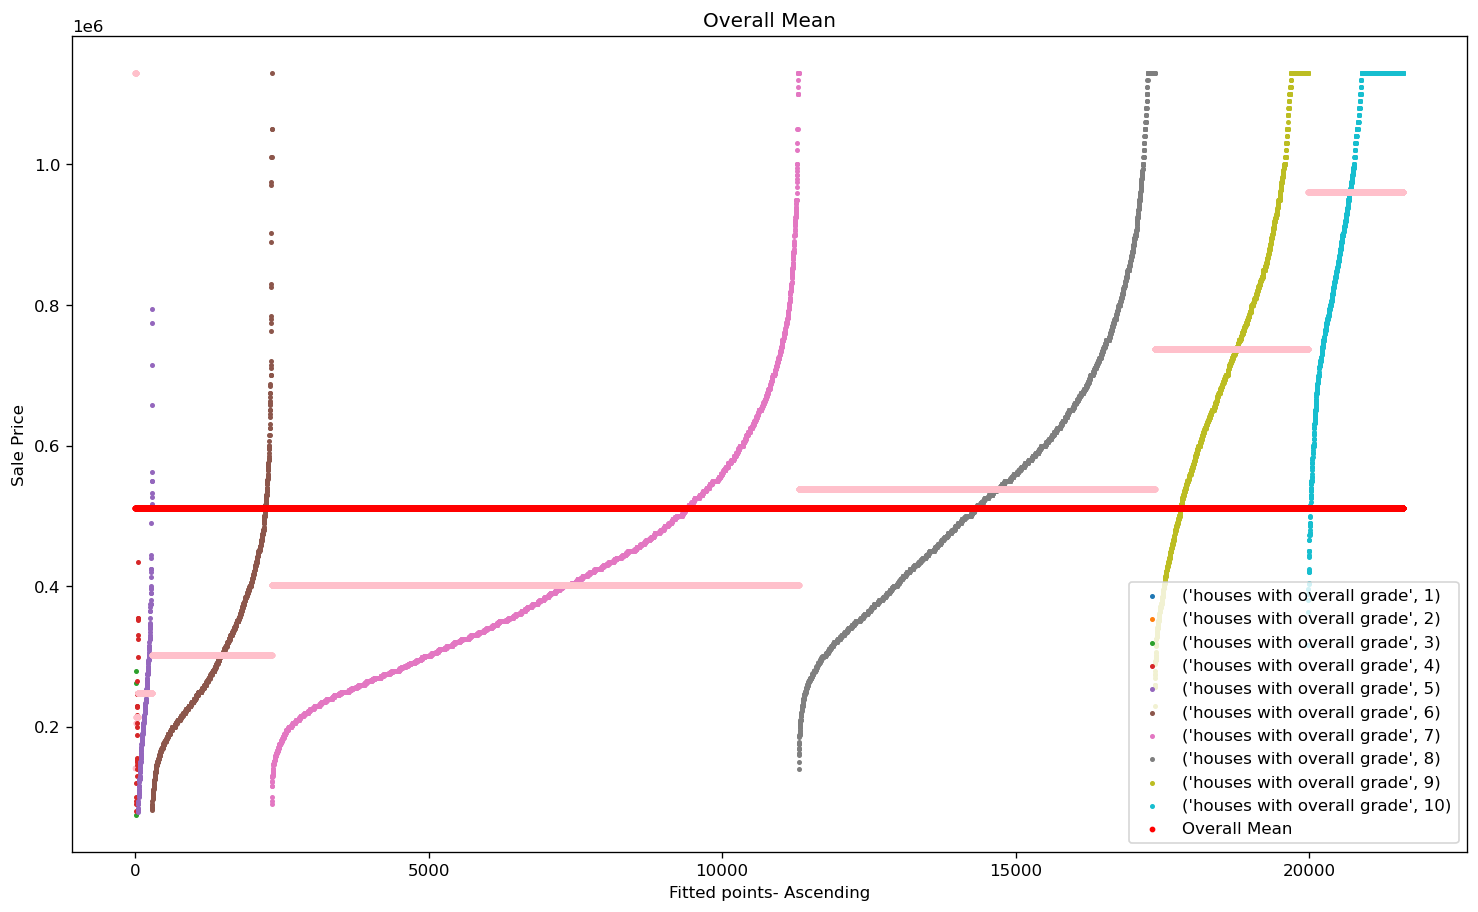

In [10]:
plt.figure(dpi=120, figsize=(15,9))

z=0
for i in range(1,11):
    #defining x-axis interval using z that seperates each grade-values into intervals
    points=[k for k in range(z, z + len(classwise_list[i-1]))]
    #Plotting:
    plt.scatter(points, classwise_list[i-1].sort_values(), label=("houses with overall grade", i), s=4)
    plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s=6, color="pink")
    z=max(points)+1

plt.scatter([q for q in range(0,z)], THD['mean_sales'], color="red", label="Overall Mean", s=6)

plt.xlabel("Fitted points- Ascending")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend(loc=4)
plt.show()
    




## Residual Plot:

##### Difference in means and sale price:

In [11]:
mean_difference=THD['mean_sales']-THD['Sale_Price']
grade_mean_difference=THD['grade_mean']-THD['Sale_Price']

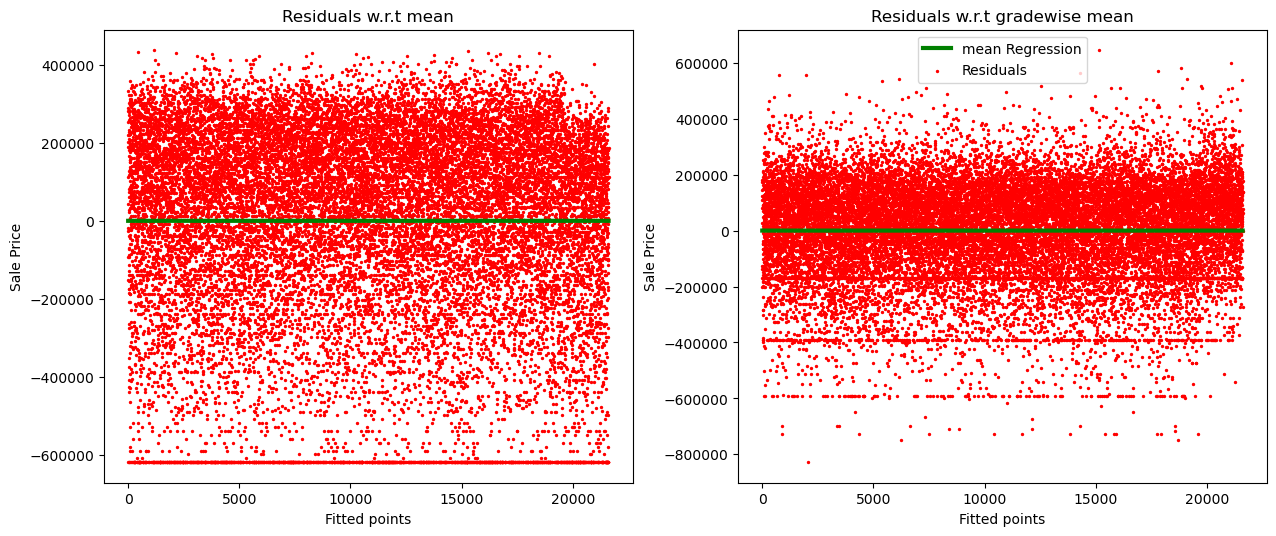

In [12]:
k=range(0, len(THD))
l=[0 for i in range(len(THD))]

plt.figure(figsize=(15,6), dpi=100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color="red", label="Residuals", s=2)
plt.plot(k, l, label="mean Regression", linewidth=3, color="green")
plt.xlabel("Fitted points")
plt.ylabel("Sale Price")
plt.title("Residuals w.r.t mean")

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color="red", label="Residuals", s=2)
plt.plot(k, l, label="mean Regression", linewidth=3, color="green")
plt.xlabel("Fitted points")
plt.ylabel("Sale Price")
plt.legend()
plt.title("Residuals w.r.t gradewise mean")

plt.show()

## Evaluation of Error in the Model:

##### Mean Error:

In [13]:
cost=sum(mean_difference)/len(THD)
print(round(cost,7))

0.0


##### Why is the mean error zero? It's because the error can be positive or negative as shown by the graph above, and the positive and negative errors cancel out each other

### Mean Absolute Error:
##### First define the values to calculate it:

In [14]:
Y=THD['Sale_Price']
Y_hat1=THD['mean_sales']
Y_hat2=THD['grade_mean']
n=len(THD)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [15]:
cost_mean=sum(abs(Y-Y_hat1))/n
cost_grade_mean=sum(abs(Y-Y_hat2))/n
print(cost_mean)
print(cost_grade_mean)

199168.78146839526
137081.70298203363


#### Error can also be calculated by:

In [16]:
from sklearn.metrics import mean_absolute_error as mae
cost_grade_mean=mae(Y,Y_hat2)
print(cost_grade_mean)

137081.7029820291


### Mean squared Error:

In [17]:
from sklearn.metrics import mean_squared_error as mse
cost_mean=mse(Y_hat1, Y)
cost_grade_mean=mse(Y_hat2, Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

### Root Mean squared Error:

In [18]:
from sklearn.metrics import mean_squared_error as mse
cost_mean=mse(Y_hat1, Y)**0.5
cost_grade_mean=mse(Y_hat2, Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

### R (Accuracy of the model):

In [19]:
Y=THD['Sale_Price']
Y_hat=THD['grade_mean']
Y_bar=THD['mean_sales']
n=len(THD)

len(Y), len(Y_hat), len(Y_bar), n

(21609, 21609, 21609, 21609)

In [20]:
mse_mean=mse(Y_bar, Y)
mse_mean

62528116847.799576

In [21]:
mse_model=mse(Y_hat, Y)
mse_model

30804835720.342426

In [22]:
R2 = 1-(mse_model/mse_mean)
R2

0.5073442592981836

##### So this model gives a 50% accuracy compared to a mean regression model

# Linear Regression

##### Seperate the data into a new dataframe using pandas:

In [23]:
sale_price=THD['Sale_Price'].head(30)
flat_area=THD['Flat Area (in Sqft)'].head(30)
sample_data=pandas.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


##### Plotting this data in a scatterplot using matplotlib:

No handles with labels found to put in legend.


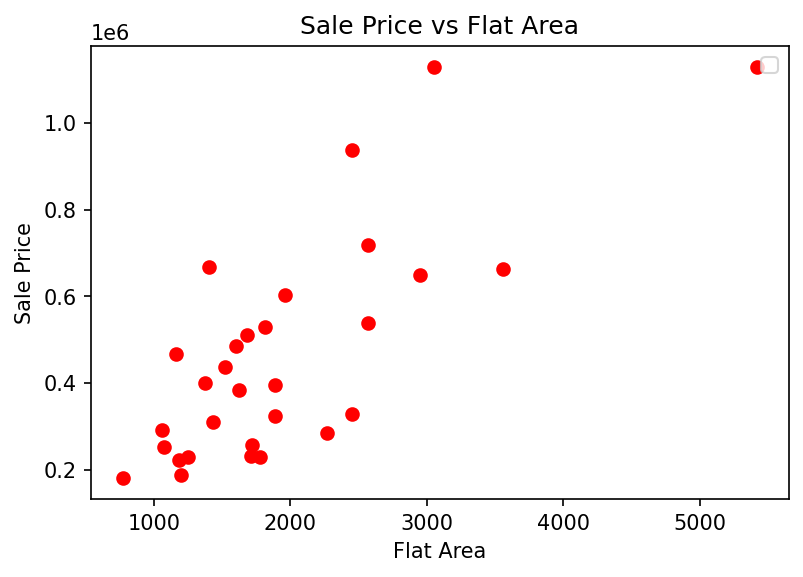

In [24]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color="red")
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Sale Price vs Flat Area")
plt.legend()
plt.show()

##### Mean Regression model for this data:

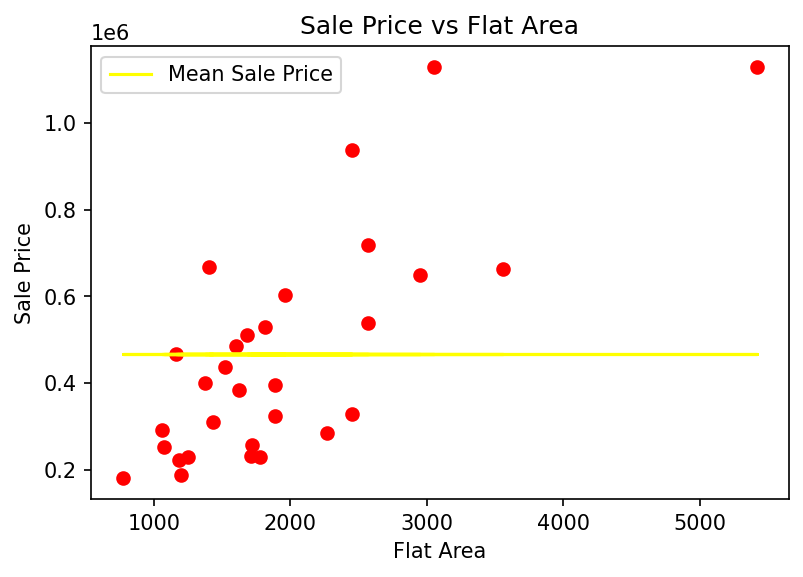

In [25]:
sample_data['mean_sale_price']=sample_data.sale_price.mean()

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color="red")
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, label="Mean Sale Price", color="yellow")
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Sale Price vs Flat Area")
plt.legend()
plt.show()

##### The Mean Regression model is therefore clearly wrong because all houses cannot have the same sale price irrespective of the flat area

#### A better line would be a straight line that is closest to the points in the scatter plot. Linear Regression creates a linear relationship between the target variable and independent numerical variable

### Cost Function:

In [26]:
def slope_error(slope, intercept, data):
    result=[]
    for i in range(len(data.flat_area)):
        tmp=slope*data.flat_area[i]+intercept
        result.append(tmp)
    MSE=mse(result,data.sale_price)
    return MSE

In [27]:
Cost=[]
slope=[i/10 for i in range(0,5000)]

for i in slope:
    cost=slope_error(i, intercept=0, data=sample_data)
    Cost.append(cost)

In [28]:
Cost_table=pandas.DataFrame({'slope':slope, 'cost':Cost})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


##### Plotting the Cost Values corresponding to every value of Slope:

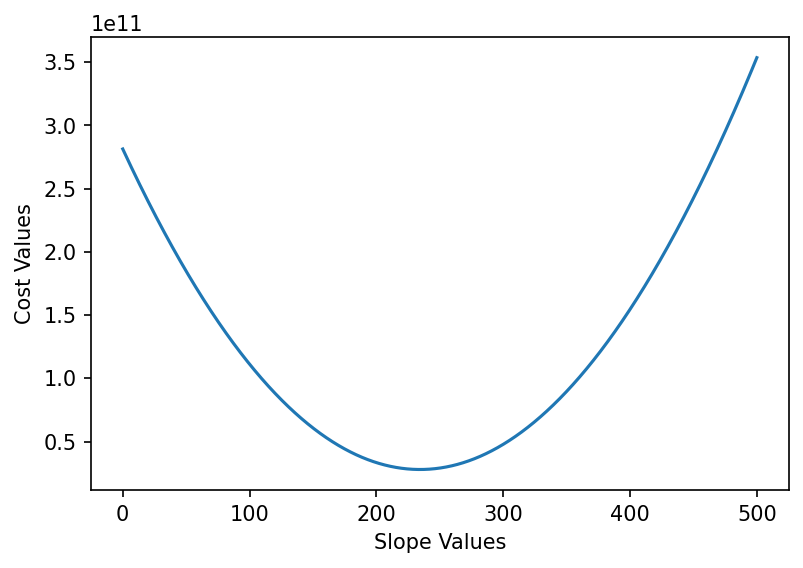

In [29]:
plt.figure(dpi=150)
plt.plot(Cost_table.slope, Cost_table.cost)
plt.xlabel("Slope Values")
plt.ylabel("Cost Values")
plt.show()

##### To get the lowest cost from this convex curve:

In [30]:
new_slope=Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()][2343]
new_slope

234.3

##### Cost function due to intercept:

In [31]:
intercept= [i for i in range(5000, 50000)]
Cost=[]
for i in intercept:
    cost=slope_error(data=sample_data, intercept=i, slope=234)
    Cost.append(cost) 

##### Plotting the Cost values corresponding to every value of Slope:

In [32]:
Cost_Table2=pandas.DataFrame({'intercept':intercept, 'cost':Cost})
Cost_Table2.tail()

,intercept,cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


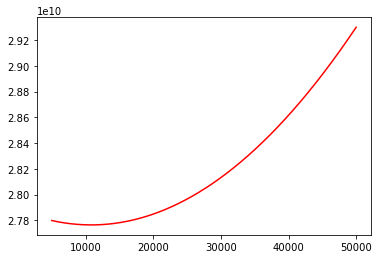

In [33]:
plt.plot(Cost_Table2.intercept, Cost_Table2.cost, color="red")
plt.show()

In [34]:
new_intercept=Cost_Table2['intercept'][Cost_Table2['cost']==Cost_Table2['cost'].min()].values
new_intercept[0]

10834

#### But the value of slope for least cost corresponding to the above value of intercept is different from the value of slope we got earlier. Therefore the slope and intercept are interdependent. We need to repeat this process till the value of slope and intercept agree with each other to give the least possible cost. This will be a very tedious process if there are 'n' input variables instead of 2, which is why we need:

# Gradient Descent

#### Step 1: Define a function to initialize parameters for the target variable:

In [35]:
def param_init(Y):
    #Y=target variable, returns initialized values of m and c
    m=0.1
    c=Y.mean()
    return m,c

#### Step 2: Return predictions for every value of target variable for the independent variable for the given slope and intercept:

In [36]:
def generate_predictions(m,c,X):
    #X=independent variable
    prediction=[]
    for x in X:
        tmp=(m*x)+c
        prediction.append(tmp)
    return prediction

#### Step 3: Calculate cost for the predictions:

In [37]:
def compute_cost(pred, Y):
    return np.sum(((pred-Y)**2)/len(Y))

#### Step 4: Calculate gradients:

In [38]:
def gradients(pred, Y, X):
    Gm=(2/len(Y))*np.sum((pred-Y)*X)
    Gc=(2/len(Y))*np.sum(pred-Y)
    return Gm,Gc

#### Step 5: Update Parameters:

In [39]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    m_new=m_old-(alpha*Gm_old)
    c_new=c_old-(alpha*Gc_old)
    return m_new, c_new

In [40]:
def result(m, c, X, Y, cost, pred, i):
    if i<max_iter-1:
        print("Gradient descent has converged at iteration {}".format(i))
    else:
        print("Result after {} max iterations is:".format(max_iter))
    
    plt.figure(figsize=(14,7), dpi=120)
    plt.scatter(X, Y, color="red", label="Data Points")
    label="final regression line with m={} and c={}".format(str(m), str(c))
    plt.plot(X, pred, label=label, color="green")
    plt.xlabel("Flat Area")
    plt.ylabel("Sale Price")
    plt.legend()

#### Final Step:

After iteration  0  m =  0.11316346413633305  c =  1.1849780416165836e-16  Cost =  0.85836535863667
After iteration  20  m =  0.3275595607435688  c =  1.240489192847842e-16  Cost =  0.6182472245590185
After iteration  40  m =  0.4706921039517346  c =  1.3248661427193537e-16  Cost =  0.5112264752046607
After iteration  60  m =  0.5662485308150865  c =  1.415904430738617e-16  Cost =  0.46352728398628984
After iteration  80  m =  0.6300427631414932  c =  1.4951003398285442e-16  Cost =  0.4422677351921283
After iteration  100  m =  0.6726323011945988  c =  1.611303683072644e-16  Cost =  0.4327923457067555
After iteration  120  m =  0.7010654163122192  c =  1.666074685620818e-16  Cost =  0.42856916078553225
After iteration  140  m =  0.7200475906265729  c =  1.6660746856208182e-16  Cost =  0.4266868855601835
After iteration  160  m =  0.7327202415200801  c =  1.669405354694694e-16  Cost =  0.42584795473189874
After iteration  180  m =  0.7411806042798547  c =  1.6694053546946945e-16  Cost =

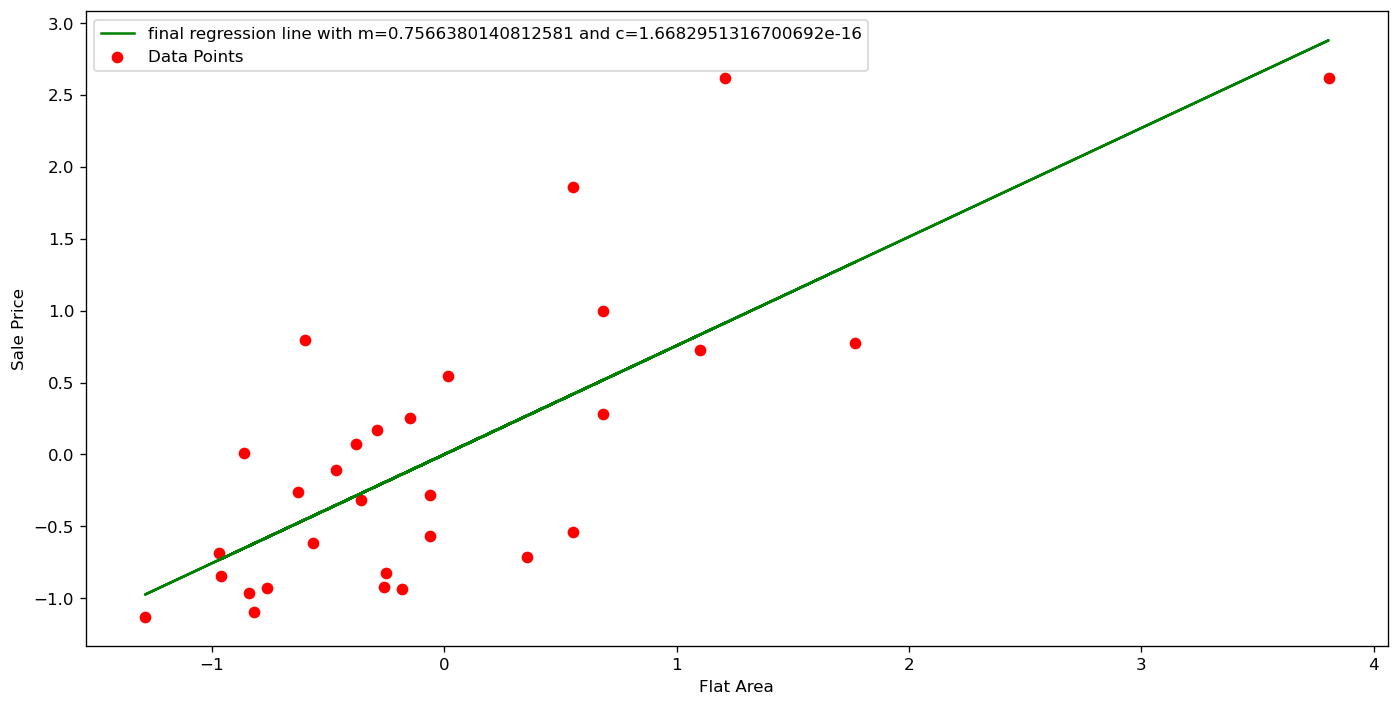

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sale_price=scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area=scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

max_iter=1000
alpha=0.01
cost_old=0

m,c=param_init(sale_price)

for i in range(0,max_iter):
    
    predictions=generate_predictions(m,c,flat_area)
    cost_new=compute_cost(predictions, sale_price)
    if abs(cost_new-cost_old)<(10**-7):
        break
    Gm,Gc = gradients(predictions, sale_price, flat_area)
    m,c=param_update(m,c,Gm,Gc,alpha)
    
    if i%20==0:
        print("After iteration ",i," m = ",m," c = ",c," Cost = ", cost_new)
    
    cost_old=cost_new
    
result(m, c, flat_area, sale_price, cost_new, predictions, i)

# Treating MultiCollinearity

In [42]:
THD=pandas.read_csv("Transformed_Housing_Data2.csv")

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=THD['Sale_Price']
X=scaler.fit_transform(THD.drop(columns=['Sale_Price']))
X=pandas.DataFrame(data=X, columns=THD.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


##### Check correlation between variables:

In [44]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [45]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if ( (k.loc[i,j]>0.5)&(i!=j) )]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

##### Each pair occurs twice, so there are actually 16 pairs of data with correlation > 0.5

## Calculating VIF (Variance Inflation Factor)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

VIF=pandas.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

##### Removing variables with high VIF:

In [47]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [48]:
def MC_remover(data):
    VIF=pandas.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
    if VIF.max()>5:
        data=data.drop(columns=[VIF[VIF==VIF.max()].index[0]])
        print(VIF[VIF==VIF.max()].index[0]," has been removed")
    else:
        print("No multicollinearity present anymore")
    return data

In [49]:
for i in range(7):
    vif_data=MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


##### Remaining columns:

In [50]:
for i in range(7):
    vif_data=MC_remover(vif_data)
vif_data.head()

No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [51]:
VIF=pandas.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF, len(vif_data.columns), len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

In [52]:
vif_data

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.337386,2.789023,-0.30579,0.340581,-0.311996,-0.658697,-1.293712,1.005026,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,-0.224356,0.936817,-0.30579,0.340581,0.630080,-0.658697,-1.463938,-0.356184,...,-0.087181,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-0.332099,0.936817,-0.30579,-0.563993,-0.927969,-0.658697,-1.293712,0.247916,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.307041,0.936817,-0.30579,0.340581,-0.227451,-0.658697,-1.123485,-0.184409,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Train/Test Set:

In [53]:
x=vif_data
y=THD['Sale_Price']

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(x,y, test_size=0.3, random_state=101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# Building the Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

lr.fit(x_train, y_train) #This function does all the above procedures of calculating the cost function and gradient decent

LinearRegression(normalize=True)

##### The above code implements gradient descent and finds the best set of parameters to model the data:

In [55]:
lr.coef_ #This gives all the coefficients/slopes(m1, m2...etc) for the independent variables

array([ -3928.66247639,  12028.4456069 ,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [56]:
predictions=lr.predict(x_test)
lr.score(x_test, y_test) #Calculated the R^2 value of the model

0.8461987715586201

## Residuals

In [57]:
residuals= predictions-y_test

residual_table= pandas.DataFrame({"predictions":predictions, "residuals":residuals})
residual_table=residual_table.sort_values(by="predictions")

residual_table

,predictions,residuals
1147,-1.518999e+05,-226899.922361
19450,-6.879527e+04,-210795.272576
4201,9.942282e+03,-140057.717848
11586,3.104344e+04,-156956.559744
13714,3.449980e+04,-145500.198922
...,...,...
6506,1.499538e+06,369963.447042
9252,1.528050e+06,398475.423771
15253,1.570681e+06,441105.516766
18475,1.574000e+06,444424.624355


In [58]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

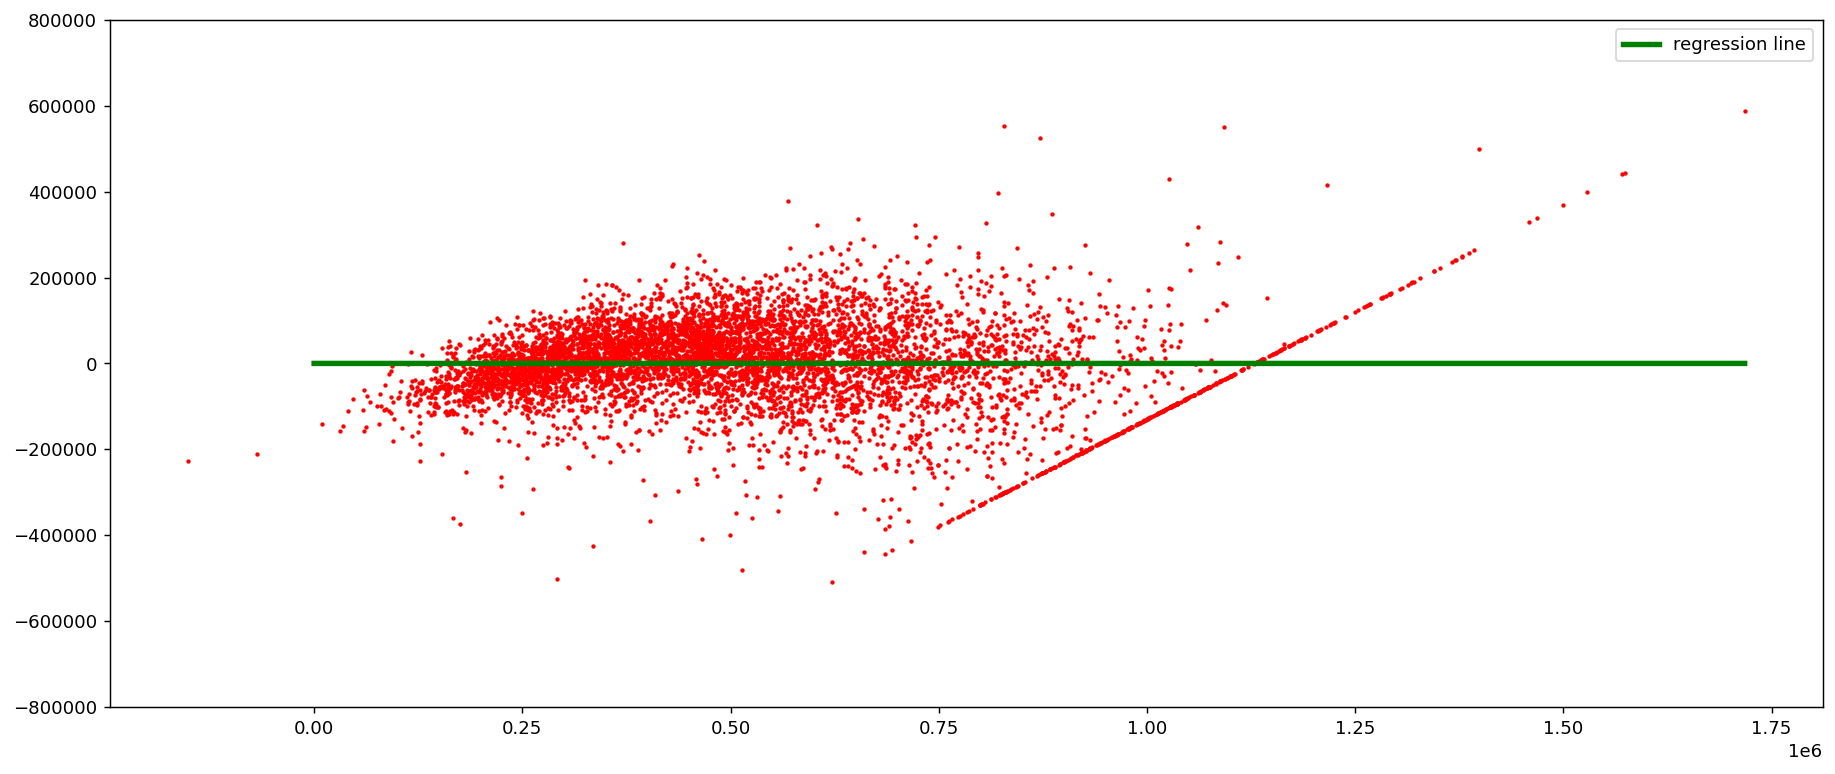

In [59]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter(residual_table['predictions'], residual_table['residuals'], color="red", s=2)
plt.plot(z,k, color="green", linewidth=3, label="regression line")
plt.ylim(-800000, 800000)
plt.legend()
plt.show()

##### Distribution of errors:

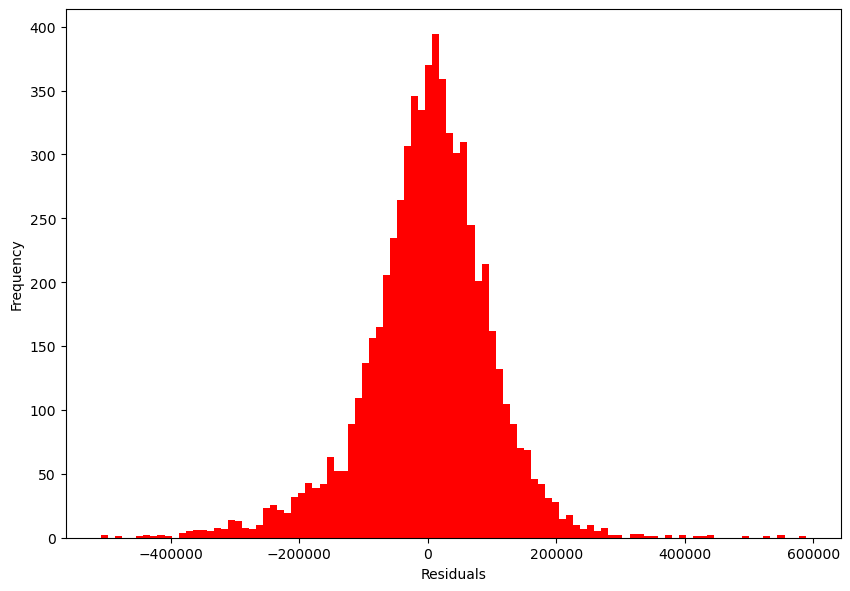

In [60]:
plt.figure(dpi=100, figsize=(10,7))
plt.hist(residual_table['residuals'], color="red", bins=100)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Magnitude of Coefficients

In [61]:
coefficients_table=pandas.DataFrame({'column':x_train.columns, 'coefficients':lr.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficients')
coefficients_table

,column,coefficients
10,Longitude,-23854.326402
13,Years Since Renovation,-10179.085198
0,No of Bedrooms,-3928.662476
12,Lot Area after Renovation (in Sqft),-2896.985429
16,Condition_of_the_House_Okay,-2296.648881
3,No of Floors,2697.552786
15,Condition_of_the_House_Good,5095.976036
18,Waterfront_View_Yes,10761.770079
1,No of Bathrooms,12028.445607
19,Zipcode_Group_Zipcode_Group_1,12165.833721


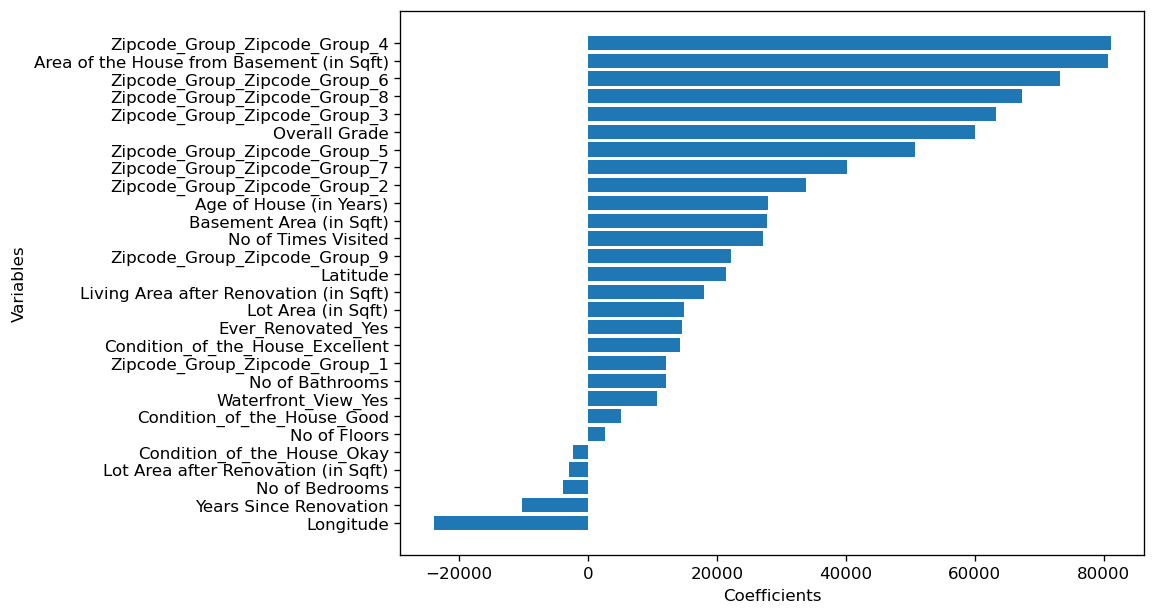

In [62]:
plt.figure(dpi=120, figsize=(8,6))
plt.barh(coefficients_table['column'], coefficients_table['coefficients'])
plt.ylabel("Variables")
plt.xlabel("Coefficients")
plt.show()

# Feature Engineering

In [63]:
RHD=pandas.read_csv("Raw_Housing_Prices3.csv")
RHD

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21605,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21606,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21607,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [64]:
sum(RHD.isnull().sum())

0

##### Preprocessing Flat Area:

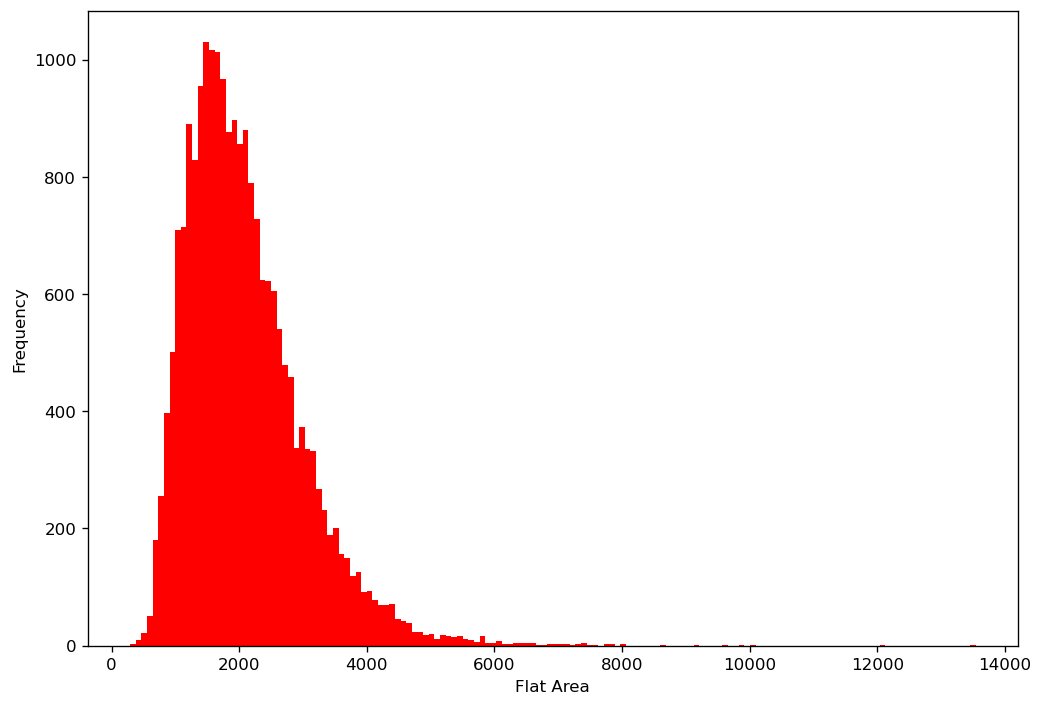

In [65]:
plt.figure(dpi=120, figsize=(10,7))
plt.hist(RHD['Flat Area (in Sqft)'], bins=150, color="red")
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.show()

##### The data is right skewed so we apply log on it:

In [66]:
def log_transform(data):
    return np.log(data)

In [67]:
RHD["Transformed Flat Area"]=RHD["Flat Area (in Sqft)"].map(log_transform)

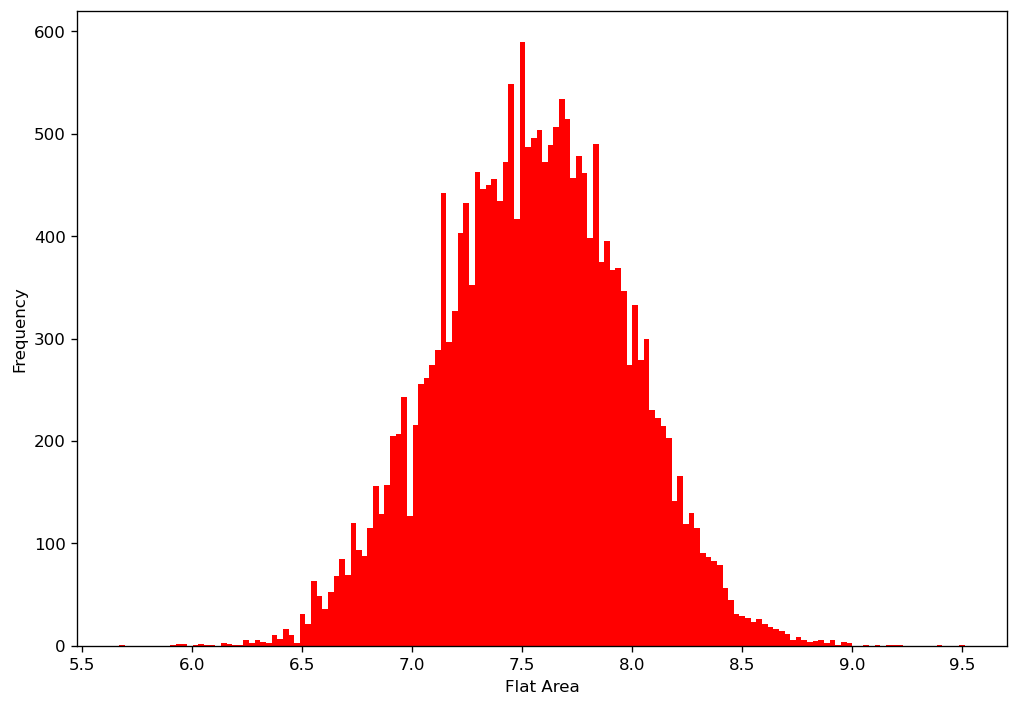

In [68]:
plt.figure(dpi=120, figsize=(10,7))
plt.hist(RHD["Transformed Flat Area"], bins=150, color="red")
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.show()

## Label Encoding

In [69]:
label_encoded=RHD['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

##### Converting the categories from string format to numerical format:

In [70]:
label_encoded= label_encoded.map({'Bad':1, 'Okay':2, 'Fair':3, 'Good':4, 'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

## Binning

In [71]:
mean=[]

for i in RHD['Condition of the House'].unique():
    mean.append(RHD['Sale Price'][RHD['Condition of the House']==i].mean())

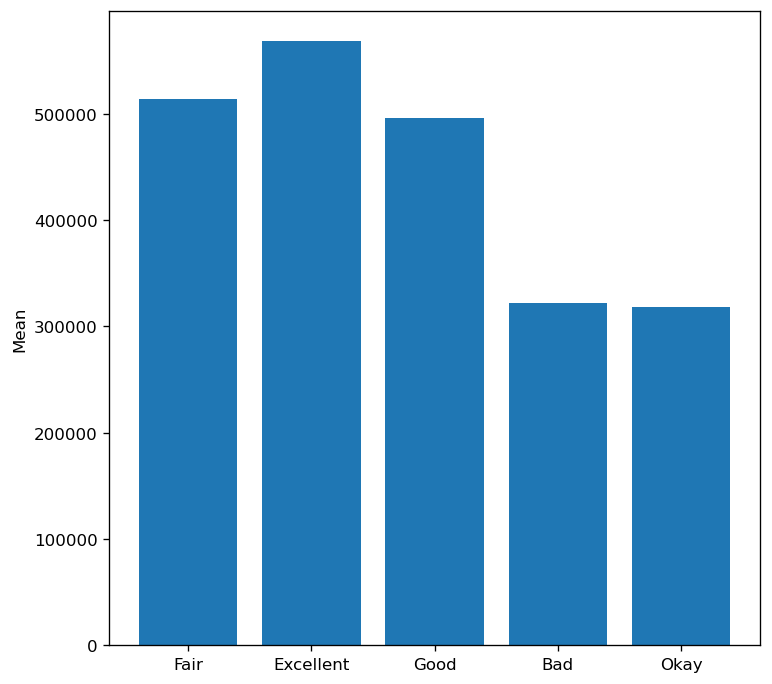

In [72]:
plt.figure(dpi=120, figsize=(7,7))
plt.bar(RHD['Condition of the House'].unique(), mean)
plt.ylabel("Mean")
plt.show()

##### Fair-Good and Bad-Okay are redundant

In [73]:
mapping={'Excellent':'Excellent', 'Fair':'Good', 'Good':'Good', 'Bad':'Okay', 'Okay':'Okay'}
RHD['Condition of the House']=RHD['Condition of the House'].map(mapping)

In [74]:
mean=[]

for i in RHD['Condition of the House'].unique():
    mean.append(RHD['Sale Price'][RHD['Condition of the House']==i].mean())

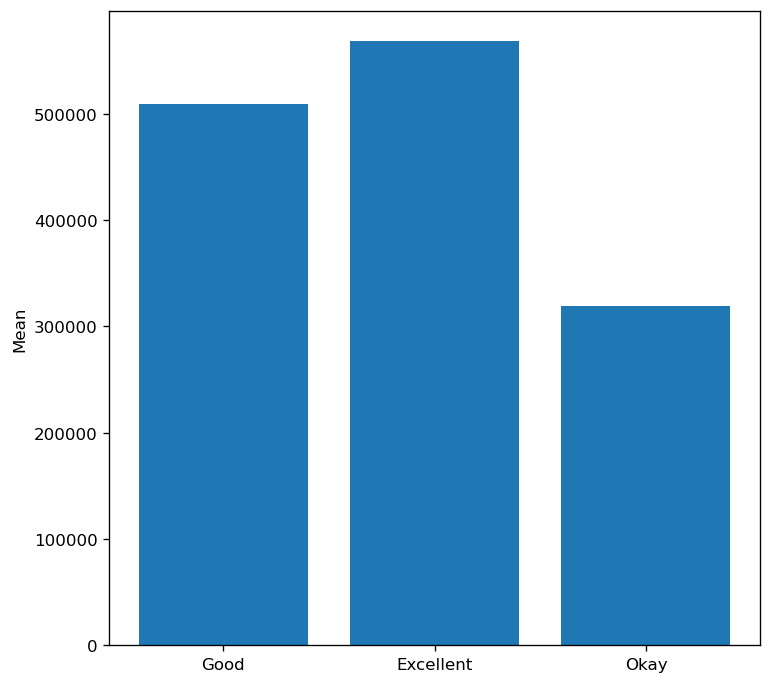

In [75]:
plt.figure(dpi=120, figsize=(7,7))
plt.bar(RHD['Condition of the House'].unique(), mean)
plt.ylabel("Mean")
plt.show()

### Binning of Continuous Variables:

In [76]:
def age_of_house(x):
    if x<10:
        x='new'
    elif x<50:
        x='old'
    else:
        x='very old'
    return x

In [77]:
cat_house_age=RHD['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

##### It is not advisable to bin a continuous variable since it results in loss of information

# -------------------------------------------xxx-------------------------------------------

# **Continued from Dimensionality Reduction:

In [78]:
lr.score(x_test, y_test)

0.8461987715586201

### Adjusted R:

In [79]:
def adj_r2(x, y, pred):
    from sklearn.metrics import r2_score
    R=r2_score(y, pred)
    n=len(y)
    m=len(x.columns)
    adjR=1-((n-1)*(1-R)/(n-(m+1)))
    return adjR

In [82]:
adj_r2(x_test, y_test, predictions)

0.8455315211098506

###### The difference in value is very low(0.001), this shows that there are some variables which are not contributing to the model